<a href="https://colab.research.google.com/github/Sedowlas/Cat-Boost/blob/main/amazon_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Экшен--ДЕЙСТВИЕ равно 1, если ресурс был одобрен, 0, если ресурс не был одобрен  
РЕСУРС--Идентификатор для каждого ресурса  
MGR_ID--Идентификатор сотрудника менеджера текущей записи идентификатора СОТРУДНИКА; у сотрудника может быть только один менеджер одновременно  
ROLE_ROLLUP_1--Группа ролей компании идентификатор категории 1 (например, US Engineering)  
ROLE_ROLLUP_2--Группа ролей компании идентификатор категории 2 (например, розничная торговля в США)  
ROLE_DEPTNAME--Описание роли отдела компании (например, Розничная торговля)  
ROLE_TITLE--Роль компании Описание названия бизнеса (например, старший инженер-менеджер по розничной торговле)  
ROLE_FAMILY_DESC--Семейство ролей компании расширенное описание (например, менеджер розничной торговли, разработка программного обеспечения)  
ROLE_FAMILY--Описание семьи ролей компании (например, менеджер по розничной торговле)  
ROLE_CODE--Код роли компании; этот код уникален для каждой роли (например, менеджер)  

https://drive.google.com/file/d/1alZ6cB0Pi7tP6Y-FYv4_fIff7MBb-gUR/view?usp=sharing

#Загрузка данных

In [ ]:
! gdown 1alZ6cB0Pi7tP6Y-FYv4_fIff7MBb-gUR

Downloading...
From: https://drive.google.com/uc?id=1alZ6cB0Pi7tP6Y-FYv4_fIff7MBb-gUR
To: /content/amazon-employee-access-challenge.zip.classification.zip
100% 1.61M/1.61M [00:00<00:00, 86.3MB/s]


In [ ]:
! unzip '/content/amazon-employee-access-challenge.zip.classification.zip'

Archive:  /content/amazon-employee-access-challenge.zip.classification.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


#Предобработка

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
len(df)

32769

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.isna().mean()

action              0.0
resource            0.0
mgr_id              0.0
role_rollup_1       0.0
role_rollup_2       0.0
role_deptname       0.0
role_title          0.0
role_family_desc    0.0
role_family         0.0
role_code           0.0
dtype: float64

In [ ]:
df['action'].value_counts()

1    30872
0     1897
Name: action, dtype: int64

#Разбивка данных на train, val и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['action'])

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['action'])

In [ ]:
train['action'].mean()

0.9421189156197548

In [ ]:
val['action'].mean()

0.9421727189502593

In [ ]:
test['action'].mean()

0.9420201403722918

#Phik

In [ ]:
train_full = pd.concat([train,val])

In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 4.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import phik

In [ ]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['action', 'resource', 'mgr_id', 'role_rollup_1', 'role_rollup_2', 'role_deptname', 'role_title', 'role_family_desc', 'role_family', 'role_code']


In [ ]:
phik_overview['action'].sort_values(ascending=False)

action              1.000000
role_family         0.110544
role_family_desc    0.080102
role_deptname       0.060070
mgr_id              0.042324
resource            0.029653
role_rollup_2       0.023925
role_rollup_1       0.019897
role_title          0.016686
role_code           0.000000
Name: action, dtype: float64

#Обучение

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['action', 'resource', 'mgr_id', 'role_rollup_1', 'role_rollup_2',
       'role_deptname', 'role_title', 'role_family_desc', 'role_family',
       'role_code'],
      dtype='object')

In [ ]:
X = ['role_family','role_family_desc','role_deptname']
y = ['action']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.08}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5989648	test: 0.5990418	best: 0.5990418 (0)	total: 67.8ms	remaining: 1m 7s
100:	learn: 0.1946339	test: 0.2043458	best: 0.2043458 (100)	total: 1.24s	remaining: 11s
200:	learn: 0.1813924	test: 0.1972686	best: 0.1972686 (200)	total: 1.91s	remaining: 7.58s
300:	learn: 0.1712745	test: 0.1918814	best: 0.1918814 (300)	total: 2.6s	remaining: 6.03s
400:	learn: 0.1635262	test: 0.1879432	best: 0.1879432 (400)	total: 3.36s	remaining: 5.01s
500:	learn: 0.1572075	test: 0.1865487	best: 0.1865487 (500)	total: 4.01s	remaining: 3.99s
600:	learn: 0.1528206	test: 0.1847493	best: 0.1847140 (595)	total: 4.64s	remaining: 3.08s
700:	learn: 0.1489035	test: 0.1834084	best: 0.1834084 (700)	total: 5.26s	remaining: 2.25s
800:	learn: 0.1456728	test: 0.1821734	best: 0.1821470 (799)	total: 6.23s	remaining: 1.55s
900:	learn: 0.1427978	test: 0.1815768	best: 0.1815250 (898)	total: 7.62s	remaining: 837ms
999:	learn: 0.1405632	test: 0.1811129	best: 0.1809879 (982)	total: 9.49s	remaining: 0us

bestTest = 0.1809

In [ ]:
test['pred'] = model.predict(test[X])

In [ ]:
test

,action,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,pred
26626,1,4675,3889,117961,118386,121668,126184,140840,118762,126186,1
26772,1,19310,68658,5110,117954,117895,117879,118250,19721,117880,1
10833,1,74829,32457,117961,118327,118320,118321,117906,290919,118322,1
10718,1,73876,22431,117961,118413,126229,118777,279443,308574,118779,1
32445,1,72445,25293,117961,118386,123072,118784,117906,290919,118786,1
...,...,...,...,...,...,...,...,...,...,...,...
19823,1,34924,8399,117961,118413,120370,122645,137960,119221,122647,1
21442,1,28149,46374,118315,118316,225010,119849,134910,118638,119851,1
6693,1,29304,57164,117975,117976,117912,117885,117913,117887,117888,1
13254,1,39628,5115,117961,118300,118631,119587,176829,118704,119589,1


#Обучение на всех фичах

In [ ]:
train

,action,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code
23130,1,31702,1373,117943,117944,117945,118274,192835,292795,118276
3307,1,43876,56680,118079,118080,117878,117879,117913,19721,117880
30009,1,37009,2014,117961,117962,117904,118958,127525,118960,118961
9961,0,45609,3838,117961,118225,119924,118321,118448,290919,118322
22289,0,78367,54618,117961,118052,118992,118321,117906,290919,118322
...,...,...,...,...,...,...,...,...,...,...
17730,1,80383,4669,117961,118327,118391,118321,117906,290919,118322
27566,0,18072,51734,118256,118257,117945,117946,119235,292795,117948
5359,1,27623,86387,117961,118327,4674,118321,117906,290919,118322
20282,1,80195,2270,117961,118413,277693,118777,279443,308574,118779


In [ ]:
X = ['role_family','role_family_desc','role_deptname','resource','mgr_id','role_rollup_1','role_rollup_2','role_title','role_code']
y = ['action']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.10}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5773325	test: 0.5776275	best: 0.5776275 (0)	total: 26.9ms	remaining: 26.9s
100:	learn: 0.1718685	test: 0.1893371	best: 0.1893371 (100)	total: 1.79s	remaining: 15.9s
200:	learn: 0.1474351	test: 0.1786174	best: 0.1786174 (200)	total: 2.65s	remaining: 10.5s
300:	learn: 0.1305655	test: 0.1733886	best: 0.1733710 (299)	total: 3.71s	remaining: 8.61s
400:	learn: 0.1175948	test: 0.1695715	best: 0.1695245 (399)	total: 4.58s	remaining: 6.84s
500:	learn: 0.1071816	test: 0.1675385	best: 0.1675385 (500)	total: 5.41s	remaining: 5.39s


In [ ]:
test['pred_all'] = model.predict(test[X])

In [ ]:
test.head()

,action,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,pred,pred_all,score,Action
26626,1,4675,3889,117961,118386,121668,126184,140840,118762,126186,1,1,0.996079,1
26772,1,19310,68658,5110,117954,117895,117879,118250,19721,117880,1,1,0.930216,1
10833,1,74829,32457,117961,118327,118320,118321,117906,290919,118322,1,1,0.981912,1
10718,1,73876,22431,117961,118413,126229,118777,279443,308574,118779,1,1,0.977403,1
32445,1,72445,25293,117961,118386,123072,118784,117906,290919,118786,1,1,0.973793,1


#Test

In [ ]:
dff = pd.read_csv('/content/test.csv')

In [ ]:
dff.head()

In [ ]:
len(dff)

In [ ]:
dff.columns = dff.columns.str.lower()

In [ ]:
dff.isna().mean()

In [ ]:
X = ['role_family','role_family_desc','role_deptname','resource','mgr_id','role_rollup_1','role_rollup_2','role_title','role_code']
y = ['action']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.10}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.5773325	test: 0.5776275	best: 0.5776275 (0)	total: 24.5ms	remaining: 24.5s
100:	learn: 0.1718685	test: 0.1893371	best: 0.1893371 (100)	total: 2.05s	remaining: 18.3s
200:	learn: 0.1474351	test: 0.1786174	best: 0.1786174 (200)	total: 4.58s	remaining: 18.2s
300:	learn: 0.1305655	test: 0.1733886	best: 0.1733710 (299)	total: 6.48s	remaining: 15.1s
400:	learn: 0.1175948	test: 0.1695715	best: 0.1695245 (399)	total: 8.56s	remaining: 12.8s
500:	learn: 0.1071816	test: 0.1675385	best: 0.1675385 (500)	total: 10.7s	remaining: 10.6s
600:	learn: 0.0982697	test: 0.1666070	best: 0.1665211 (599)	total: 13.4s	remaining: 8.92s
700:	learn: 0.0909381	test: 0.1659736	best: 0.1659708 (627)	total: 15.8s	remaining: 6.73s
800:	learn: 0.0846977	test: 0.1659764	best: 0.1657051 (751)	total: 17.9s	remaining: 4.44s
900:	learn: 0.0784247	test: 0.1667155	best: 0.1657051 (751)	total: 18.8s	remaining: 2.07s
999:	learn: 0.0736799	test: 0.1673026	best: 0.1657051 (751)	total: 19.6s	remaining: 0us

bestTest = 0.1

In [ ]:
dff['score'] = model.predict_proba(dff[X])[:,1]

In [ ]:
test['score'] = model.predict_proba(test[X])[:,1]

In [ ]:
dff.head()

,id,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,score
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880,0.928948
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865,0.974826
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175,0.980810
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774,0.979883
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425,0.993727


In [ ]:
dff['Action'] = (dff['score'] > 0.5) * 1

In [ ]:
test['Action'] = (test['score'] > 0.5) * 1

In [ ]:
dff.head()

,id,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,score,Action
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880,0.928948,1
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865,0.974826,1
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175,0.980810,1
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774,0.979883,1
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425,0.993727,1


In [ ]:
df_new =dff[['id','Action']].copy()

In [ ]:
df_new.head()

,id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
df_new.columns = ['Id', 'Action']

In [ ]:
df_new.to_csv('amazon.csv',index=False)

#Метрики

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

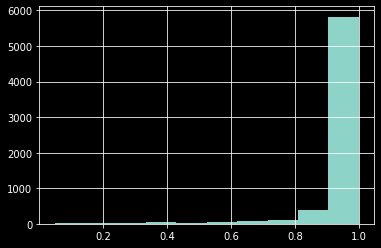

In [ ]:
test['score'].hist()

In [ ]:
train['action'].mean()

0.9421189156197548

In [ ]:
test['Action'] = (test['score'] > 0.5) * 1

In [ ]:
test

,action,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,pred,pred_all,score,Action
26626,1,4675,3889,117961,118386,121668,126184,140840,118762,126186,1,1,0.996079,1
26772,1,19310,68658,5110,117954,117895,117879,118250,19721,117880,1,1,0.930216,1
10833,1,74829,32457,117961,118327,118320,118321,117906,290919,118322,1,1,0.981912,1
10718,1,73876,22431,117961,118413,126229,118777,279443,308574,118779,1,1,0.977403,1
32445,1,72445,25293,117961,118386,123072,118784,117906,290919,118786,1,1,0.973793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,1,34924,8399,117961,118413,120370,122645,137960,119221,122647,1,1,0.977637,1
21442,1,28149,46374,118315,118316,225010,119849,134910,118638,119851,1,1,0.987056,1
6693,1,29304,57164,117975,117976,117912,117885,117913,117887,117888,1,1,0.947308,1
13254,1,39628,5115,117961,118300,118631,119587,176829,118704,119589,1,1,0.984455,1


In [ ]:
test['Action'].mean()

0.9829111992676228

##Матрица ошибок

In [ ]:
test

,action,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code,pred,pred_all,score,Action
26626,1,4675,3889,117961,118386,121668,126184,140840,118762,126186,1,1,0.996079,1
26772,1,19310,68658,5110,117954,117895,117879,118250,19721,117880,1,1,0.930216,1
10833,1,74829,32457,117961,118327,118320,118321,117906,290919,118322,1,1,0.981912,1
10718,1,73876,22431,117961,118413,126229,118777,279443,308574,118779,1,1,0.977403,1
32445,1,72445,25293,117961,118386,123072,118784,117906,290919,118786,1,1,0.973793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,1,34924,8399,117961,118413,120370,122645,137960,119221,122647,1,1,0.977637,1
21442,1,28149,46374,118315,118316,225010,119849,134910,118638,119851,1,1,0.987056,1
6693,1,29304,57164,117975,117976,117912,117885,117913,117887,117888,1,1,0.947308,1
13254,1,39628,5115,117961,118300,118631,119587,176829,118704,119589,1,1,0.984455,1


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test['action'],test['Action'])

array([[  75,  305],
       [  37, 6137]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test['action'],test['Action']).ravel()

In [ ]:
tn, fp, fn, tp

(75, 305, 37, 6137)

##Recall

In [ ]:
recall = tp / (tp + fn)

In [ ]:
recall

0.9940071266601879

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(test['action'],test['Action'])

0.9940071266601879

##Precision

In [ ]:
precision = tp / (tp + fp)

In [ ]:
precision

0.9526544551381558

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test['action'],test['Action'])

0.9526544551381558

##F1

In [ ]:
f1 = (2 * recall * precision) / (recall + precision)

In [ ]:
f1

0.9728915662650602

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test['action'],test['Action'])

0.9728915662650602

##Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['action'],test['Action']))

              precision    recall  f1-score   support

           0       0.67      0.20      0.30       380
           1       0.95      0.99      0.97      6174

    accuracy                           0.95      6554
   macro avg       0.81      0.60      0.64      6554
weighted avg       0.94      0.95      0.93      6554



In [ ]:
len(test['score'])

6554

In [ ]:
test['score'].nunique()

6483

In [ ]:
thrs = [0] + list(test['score'].unique())

In [ ]:
min(thrs)

0

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for thr in tqdm(thrs):
  test['Action_new'] = (test['score'] > thr) * 1
  result.append((thr,
                 f1_score(test['action'],test['Action_new'])))

  0%|          | 0/6484 [00:00<?, ?it/s]

In [ ]:
result[:10]

[(0, 0.9701445631678189),
 (0.9960793015596029, 0.1932466013740681),
 (0.9302164219504627, 0.9234972677595629),
 (0.9819117413099527, 0.653529666522304),
 (0.9774034476325968, 0.7208705471717483),
 (0.9737929216424989, 0.7609213661636218),
 (0.993407352064187, 0.3268009190431139),
 (0.984261343054068, 0.6124455368115295),
 (0.9891129514698669, 0.48737650933040616),
 (0.9921952309087894, 0.3811266501110966)]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [ ]:
t.sort_values('f1',ascending=False)

,thr,f1
2410,0.478547,0.972982
4965,0.516159,0.972964
1961,0.450941,0.972926
2615,0.633583,0.972921
405,0.465165,0.972917
...,...,...
5908,0.999879,0.001295
4295,0.999884,0.000971
3256,0.999890,0.000648
6063,0.999938,0.000324


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
2410,0.478547,0.972982


##ROC

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fprs, tprs, thrs = roc_curve(test['action'],test['score'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

In [ ]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,1.999971
1,0.000000,0.000162,0.999971
2,0.000000,0.002430,0.999795
3,0.000000,0.002753,0.999774
4,0.000000,0.004211,0.999697
...,...,...,...
656,0.981579,0.999676,0.144910
657,0.981579,0.999838,0.125475
658,0.992105,0.999838,0.093855
659,0.992105,1.000000,0.086865


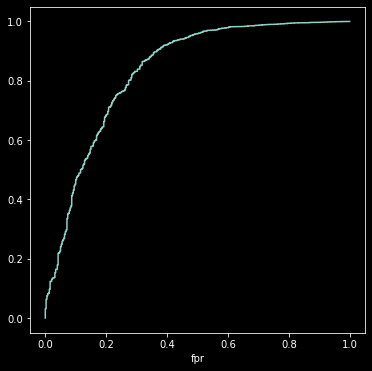

In [ ]:
roc.set_index('fpr')['tpr'].plot(figsize=(6,6))

In [ ]:
roc['random'] = roc['fpr']

In [ ]:
roc['ideal'] = 1

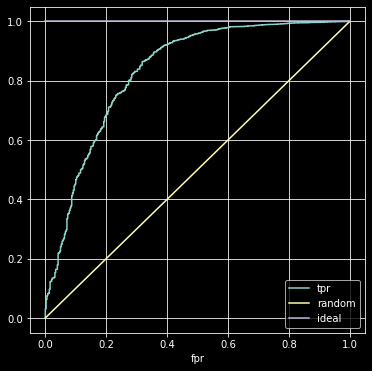

In [ ]:
roc.plot(x='fpr',y=['tpr','random','ideal'],figsize=(6,6),grid=True)

##AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test['action'],test['score'])

0.833485499462943

In [ ]:
X = ['role_family','role_family_desc','role_deptname','resource','mgr_id','role_rollup_1','role_rollup_2','role_title','role_code']
y = ['action']

In [ ]:
params = {'verbose':100,
          'eval_metric': 'AUC',
          'random_seed':42,
          'learning_rate':0.10}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	test: 0.5765806	best: 0.5765806 (0)	total: 9.37ms	remaining: 9.36s
100:	test: 0.7715732	best: 0.7715732 (100)	total: 2.29s	remaining: 20.4s
200:	test: 0.7969083	best: 0.7970720 (198)	total: 4.74s	remaining: 18.9s
300:	test: 0.8045643	best: 0.8046690 (296)	total: 6.68s	remaining: 15.5s
400:	test: 0.8157361	best: 0.8158241 (393)	total: 9.27s	remaining: 13.8s
500:	test: 0.8224783	best: 0.8224783 (500)	total: 11.2s	remaining: 11.2s
600:	test: 0.8259618	best: 0.8264177 (599)	total: 12.9s	remaining: 8.55s
700:	test: 0.8273453	best: 0.8275556 (652)	total: 13.8s	remaining: 5.87s
800:	test: 0.8280491	best: 0.8283905 (781)	total: 14.6s	remaining: 3.63s
900:	test: 0.8269873	best: 0.8283905 (781)	total: 15.5s	remaining: 1.7s
999:	test: 0.8261387	best: 0.8283905 (781)	total: 16.3s	remaining: 0us

bestTest = 0.8283905013
bestIteration = 781

Shrink model to first 782 iterations.
